In [174]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

In [175]:
sys.path.append('../External_Functions')                  # Add the folder with the functions to the path
from MyFunctions import *
matplotlib_plotparameters()                             # Set the plot parameters to something nice
from ExternalFunctions import Chi2Regression, nice_string_output, add_text_to_ax, BinnedLH, UnbinnedLH # Import functions from another file

# 4.2


In [176]:
data = np.genfromtxt('data_CountryScores.txt', delimiter=',', skip_header=1)

In [177]:
country = data[:,0]
gdp = data[:,1]
popsize = data[:,2]
happiness = data[:,3]
economic_freedom = data[:,4]
press_freedom = data[:,5]
education = data[:,6]

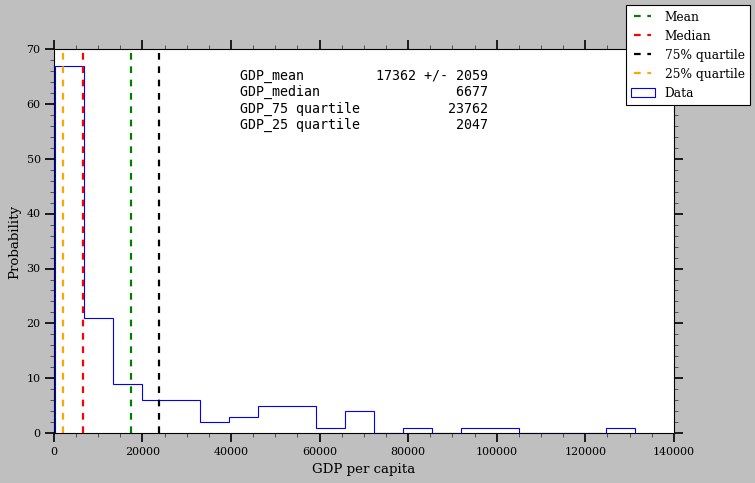

In [178]:
#Find mean, median, 75% and 25% quartile of GDP
mean_gdp = np.mean(gdp)
error_mean_gdp = np.std(gdp)/np.sqrt(len(gdp))
median_gdp = np.median(gdp)
q75_gdp, q25_gdp = np.percentile(gdp, [75 ,25])


Nbins = 20
b_width_gdp , gdp_range = bins_create(gdp, Nbins)

fig,ax = plt.subplots(1,1,figsize=(10,6))

ax.hist(gdp, bins=Nbins,range = gdp_range,histtype='step', label='Data')

d = {'GDP_mean': [mean_gdp, error_mean_gdp], 
    'GDP_median': median_gdp, 
    'GDP_75 quartile': q75_gdp, 
    'GDP_25 quartile': q25_gdp}
txt_gdp = nice_string_output(d, extra_spacing=2, decimals=0)
add_text_to_ax(0.3, 0.95, txt_gdp, ax=ax, fontsize=12)


#Plot the mean and median and the 75% and 25% quartile
ax.axvline(mean_gdp, color='g', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(median_gdp, color='r', linestyle='dashed', linewidth=2, label='Median')
ax.axvline(q75_gdp, color='k', linestyle='dashed', linewidth=2, label='75% quartile')
ax.axvline(q25_gdp, color='orange', linestyle='dashed', linewidth=2, label='25% quartile')

ax.set_xlabel('GDP per capita')
ax.set_ylabel('Probability')
fig.legend()

fig.savefig('Figures/GDP_hist.png')

In [179]:
log_popsize = np.log10(popsize)
mean_log_popsize = np.mean(log_popsize)
er_mean_log_popsize = np.std(log_popsize)/np.sqrt(len(log_popsize))
print(mean_log_popsize, er_mean_log_popsize)

logpop_b_width , logpop_range = bins_create(log_popsize, Nbins)

logpop_count,logpop_err,logpop_center, logpop_width, logpop_min, logpop_max = hist_create(log_popsize, Nbins,datamin=logpop_range[0],datamax=logpop_range[1],bin_width=logpop_b_width)
plt.close()
def gaus(x, mu, sigma):
    return Nbins*stats.norm.pdf(x, mu, sigma)

#Fit the histogram with a gaussian
logfit = Chi2Regression(gaus, logpop_center, logpop_count, logpop_err)
loggaus_fit = Minuit(logfit, mu=6.7, sigma=0.6)
loggaus_fit.migrad() 

6.962459470845413 0.057955531685078526


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.28                      │              Nfcn = 44               │
│ EDM = 5.09e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   6.99    │   0.07    │            │            │         │         │       │
│ 1 │ sigma │   0.62    │   0.06    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │  0.00437 0.000918 │
│ sigma │ 0.000918  0.00321 │
└───────┴───────────────────┘

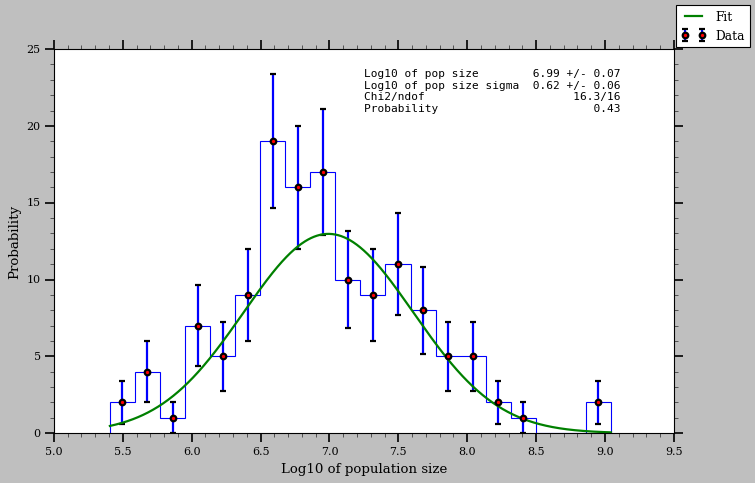

In [180]:
chi2_logpop = loggaus_fit.fval
logpop_prob, ndof = chi2_prob(loggaus_fit, len(logpop_center)-2)


#Plot the histogram and the fit
logpopspace = np.linspace(logpop_min, logpop_max, 1000)
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.errorbar(logpop_center, logpop_count, yerr=logpop_err, fmt='.', label='Data')
ax.hist(log_popsize, bins=Nbins,range = logpop_range,histtype='step',color='b')
ax.plot(logpopspace, gaus(logpopspace, *loggaus_fit.values), label='Fit')

d = {'Log10 of pop size': [loggaus_fit.values['mu'], loggaus_fit.errors['mu']],
    'Log10 of pop size sigma': [loggaus_fit.values['sigma'], loggaus_fit.errors['sigma']],
    'Chi2/ndof': f"{chi2_logpop:.1f}" '/' f"{ndof}",
    'Probability': logpop_prob}

txt_logpop = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, txt_logpop, ax=ax, fontsize=10)


ax.set_xlabel('Log10 of population size')
ax.set_ylabel('Probability')
fig.legend()

fig.savefig('Figures/Logpop_hist.png')


In [181]:
pears_hap_edu = stats.pearsonr(happiness, education)
spearman_hap_edu = stats.spearmanr(happiness, education)
print(pears_hap_edu)
print(spearman_hap_edu)

(0.7647440306793953, 8.91736545435073e-27)
SpearmanrResult(correlation=0.8043593869327467, pvalue=2.065314967435993e-31)


In [182]:
# logpop_count,logpop_err,logpop_center, logpop_width, logpop_min, logpop_max = hist_create(log_popsize, Nbins,datamin=logpop_range[0],datamax=logpop_range[1],bin_width=logpop_b_width)

gdp_binwidth, gdp_range = bins_create(gdp, Nbins)

# gdp_count,gdp_err,gdp_center, gdp_width, gdp_min, gdp_max = hist_create(gdp, Nbins,datamin=gdp_range[0],datamax=gdp_range[1],bin_width=gdp_binwidth)

happ_binwidth, happ_range = bins_create(happiness, Nbins)

# happ_count,happ_err,happ_center, happ_width, happ_min, happ_max = hist_create(happiness, Nbins,datamin=happ_range[0],datamax=happ_range[1],bin_width=happ_binwidth)
# plt.close()

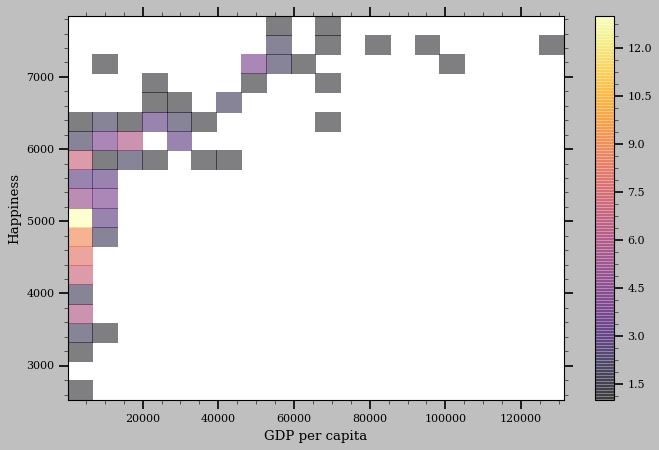

In [183]:
fig2d, ax2d = plt.subplots(1,1,figsize=(10,6))
ax2d.hist2d(gdp, happiness, bins=20, range=[gdp_range, happ_range], cmin=1, alpha=0.5, cmap='inferno')
ax2d.set_xlabel('GDP per capita')
ax2d.set_ylabel('Happiness')
#colorbar
cbar = fig2d.colorbar(ax2d.collections[0], ax=ax2d)
fig2d.savefig('Figures/GDP_happiness.png')
# Histograms for making calibration, tsky:

In [184]:
x_center_2D, mean_2D, std_2D = profile_x(gdp, happiness, bins=(11, 11), xyrange=[gdp_range, happ_range])
x_binwidth_2D = x_center_2D[1] - x_center_2D[0]

mask = std_2D != 0
x_center_2D = x_center_2D[mask]
mean_2D = mean_2D[mask]
std_2D = std_2D[mask]



In [185]:
def hyptan(x, a, b, c):
    return a*np.tanh(b*x)+c


#Fit the data with a hyperbolic tangent
hypfit = Chi2Regression(hyptan, x_center_2D, mean_2D, std_2D)
hyp_fit = Minuit(hypfit, a=2500, b=0.0015, c=4000)
hyp_fit.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.126                      │              Nfcn = 153              │
│ EDM = 1.7e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  2.90e3   │  0.18e3   │            │            │         │         │       │
│ 1 │ b    │   28e-6   │   5e-6    │            │            │         │         │       │
│ 2 │ c    │  4.48e3   │  0.15e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │   3.3e+04 -0.000431 -6.14e+03 │
│ b │ -0.000431  2.78e-11 -0.000578 │
│ c │ -6.14e+03 -0.000578  2.31e+04 │
└───┴───────────────────────────────┘

0.10565034688247235
145.1691132533029


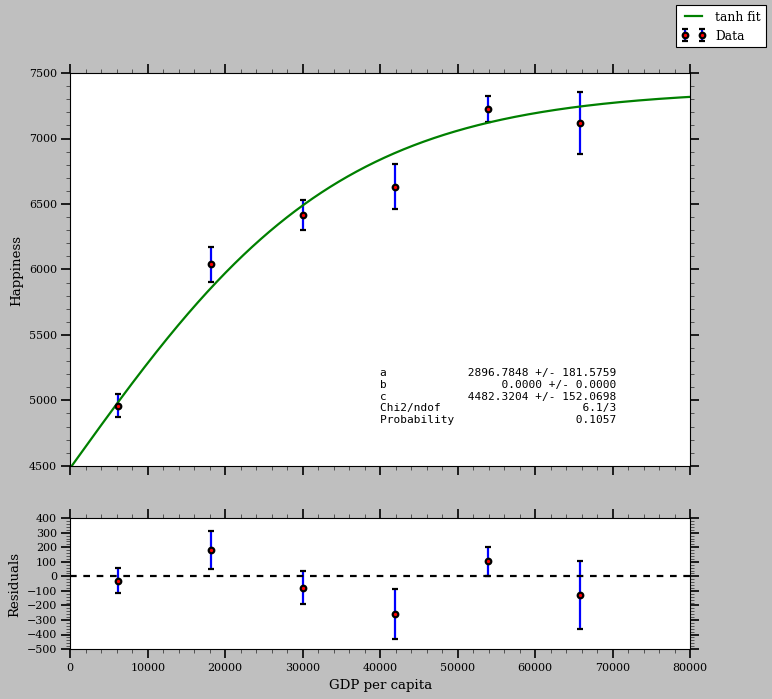

In [186]:
hyndof = len(x_center_2D)-3
hypchi2_prob, hypndof = chi2_prob(hyp_fit, len(x_center_2D)-3)
print(hypchi2_prob)
gdpspace = np.linspace(gdp_range[0], 80000, 1000)

#make plot with residual plot below
fig2d_new, ax2d_new = plt.subplots(2,1,figsize=(10,9), gridspec_kw={'height_ratios': [3, 1]},sharex=True)


ax2d_new[0].errorbar(x_center_2D, mean_2D, yerr=std_2D, fmt='.', label='Data')
ax2d_new[0].plot(gdpspace, hyptan(gdpspace, *hyp_fit.values), label='tanh fit')

d = {'a': [hyp_fit.values['a'], hyp_fit.errors['a']],
    'b': [hyp_fit.values['b'], hyp_fit.errors['b']],
    'c': [hyp_fit.values['c'], hyp_fit.errors['c']],
    'Chi2/ndof': f"{hyp_fit.fval:.1f}" '/' f"{hypndof}",
    'Probability': hypchi2_prob}

txt_hyp = nice_string_output(d, extra_spacing=2, decimals=4)
add_text_to_ax(0.5, 0.25, txt_hyp, ax=ax2d_new[0], fontsize=10)

res_happ = mean_2D - hyptan(x_center_2D, *hyp_fit.values)
std_happ = np.std(res_happ)
print(std_happ)

ax2d_new[1].errorbar(x_center_2D, res_happ, yerr=std_2D, fmt='.')
ax2d_new[1].axhline(0, color='k', linestyle='--')
ax2d_new[1].set_xlabel('GDP per capita')
ax2d_new[1].set_ylabel('Residuals')

ax2d_new[0].set_ylabel('Happiness')
fig2d_new.legend()
fig2d_new.savefig('Figures/GDP_happiness_fit.png')